# PROCEDURE
- load a time series
- iterate through each candle 
- check behind and infront of interator


### Hierarchy 
- 3 Monthly, Monthly, Weekly, Daily, 4H, 1H, 15M, 5M, 1M

In [245]:
# DATA SERIALIZATION
import pandas as pd
import numpy as np 

# FETCH DATA
import yfinance as yf
from datetime import datetime

# VISUALIZATION
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# FETCH DATA

In [246]:
# Data Extraction
start_date = "2020-11-01"
end_date = datetime.now().strftime("%Y-%m-%d")
symbol = "SPY"

# USE YAHOO FINANCE 
data = yf.download(symbol ,  start_date , end_date )
data = data[["Open" , "High" , "Low" , "Close" , "Volume"]]

data.tail(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2023-11-17,450.239990,451.420013,449.290009,450.790009,83133200
2023-11-20,450.529999,455.130005,450.519989,454.260010,69936200
2023-11-21,453.179993,454.130005,451.959991,453.269989,49244600
2023-11-22,454.980011,456.380005,453.890015,455.019989,59394900
2023-11-24,455.070007,455.500000,454.730011,455.299988,29737400


# IDENTIFY SWING

In [247]:
# Initialize lists to store swing highs and lows along with their dates
swing_highs = []
swing_high_dates = []
swing_lows = []
swing_low_dates = []

all_swing_labels = []


# Iterate through data to find swings
for i in range(1, len(data) - 1):
    prev_high = data.iloc[i - 1]['High']
    curr_high = data.iloc[i]['High']
    next_high = data.iloc[i + 1]['High']

    prev_low = data.iloc[i - 1]['Low']
    curr_low = data.iloc[i]['Low']
    next_low = data.iloc[i + 1]['Low']

    is_swing_high = curr_high >= prev_high and curr_high >= next_high
    is_swing_low  = curr_low  <= prev_low  and curr_low  <= next_low

    if is_swing_high:
        swing_highs.append(curr_high)
        swing_high_dates.append(data.index[i])
        all_swing_labels.append( "high swing") 
        print(f"{data.index[i]}: Found a high swing")
    elif is_swing_low:
        swing_lows.append(curr_low)
        swing_low_dates.append(data.index[i])
        all_swing_labels.append( "low swing") 
        print(f"{data.index[i]}: Found a low swing")
    else:
        all_swing_labels.append( "undefined") 
        print(f"{data.index[i]}: Undefined Swing Regime")

2020-11-03 00:00:00: Undefined Swing Regime
2020-11-04 00:00:00: Undefined Swing Regime
2020-11-05 00:00:00: Found a high swing
2020-11-06 00:00:00: Found a low swing
2020-11-09 00:00:00: Found a high swing
2020-11-10 00:00:00: Found a low swing
2020-11-11 00:00:00: Found a high swing
2020-11-12 00:00:00: Found a low swing
2020-11-13 00:00:00: Undefined Swing Regime
2020-11-16 00:00:00: Found a high swing
2020-11-17 00:00:00: Undefined Swing Regime
2020-11-18 00:00:00: Undefined Swing Regime
2020-11-19 00:00:00: Found a low swing
2020-11-20 00:00:00: Undefined Swing Regime
2020-11-23 00:00:00: Found a low swing
2020-11-24 00:00:00: Found a high swing
2020-11-25 00:00:00: Undefined Swing Regime
2020-11-27 00:00:00: Found a high swing
2020-11-30 00:00:00: Found a low swing
2020-12-01 00:00:00: Found a high swing
2020-12-02 00:00:00: Found a low swing
2020-12-03 00:00:00: Undefined Swing Regime
2020-12-04 00:00:00: Found a high swing
2020-12-07 00:00:00: Undefined Swing Regime
2020-12-08 

## VISUALIZE SWINGS

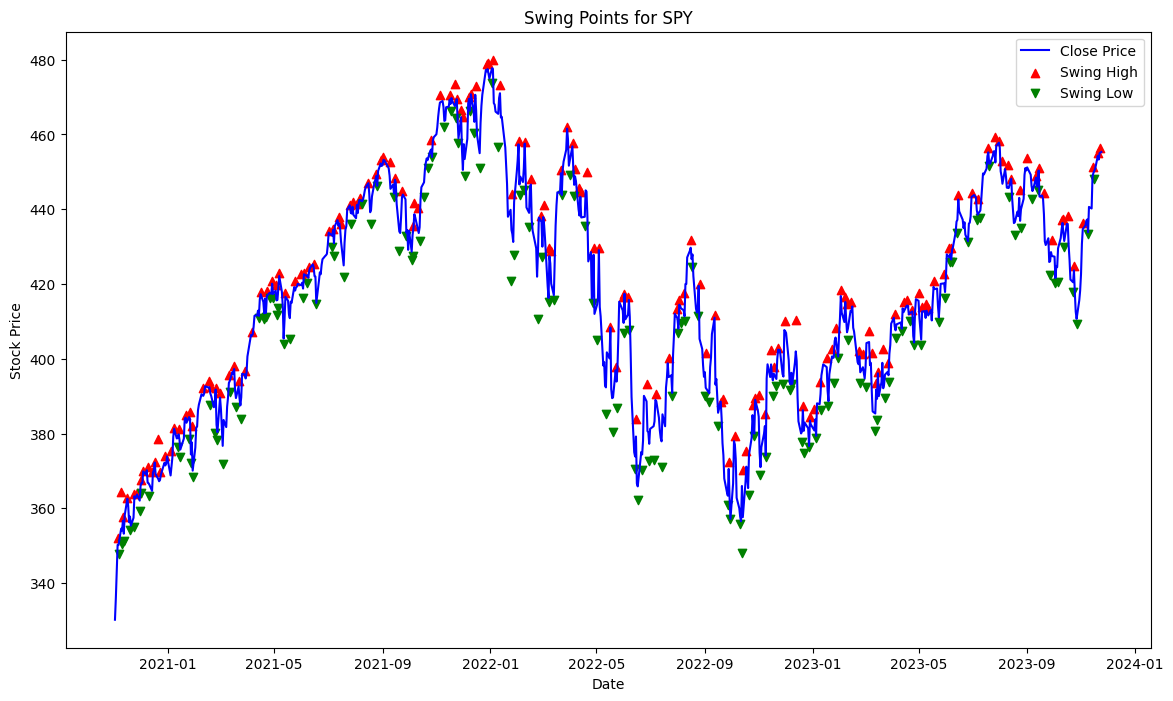

In [248]:
# Create a plot
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the stock price
ax.plot(data.index, data['Close'], label='Close Price', color='blue')

# Add markers for swing highs
ax.scatter(swing_high_dates, swing_highs, label='Swing High', color='red', marker='^')

# Add markers for swing lows
ax.scatter(swing_low_dates, swing_lows, label='Swing Low', color='green', marker='v')

# Add labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
ax.set_title(f'Swing Points for {symbol}')

# Add legend
ax.legend()

# Show the plot
plt.show()


### Add Swings to dataset

In [249]:
# Drop the first and last row of the DataFrame
data = data.iloc[1:-1]

# Verify the length match
if len(data) == len(all_swing_labels):
    # Assign all_swing_labels as a new column
    data['Swings'] = all_swing_labels
else:
    print("Length mismatch: DataFrame and labels list do not have the same length.")

data.tail(5)

,Open,High,Low,Close,Volume,Swings
Date,,,,,,
2023-11-16,449.220001,450.559998,448.119995,450.230011,66665800,low swing
2023-11-17,450.239990,451.420013,449.290009,450.790009,83133200,undefined
2023-11-20,450.529999,455.130005,450.519989,454.260010,69936200,high swing
2023-11-21,453.179993,454.130005,451.959991,453.269989,49244600,undefined
2023-11-22,454.980011,456.380005,453.890015,455.019989,59394900,high swing


# ITERATIVE ANALYSIS
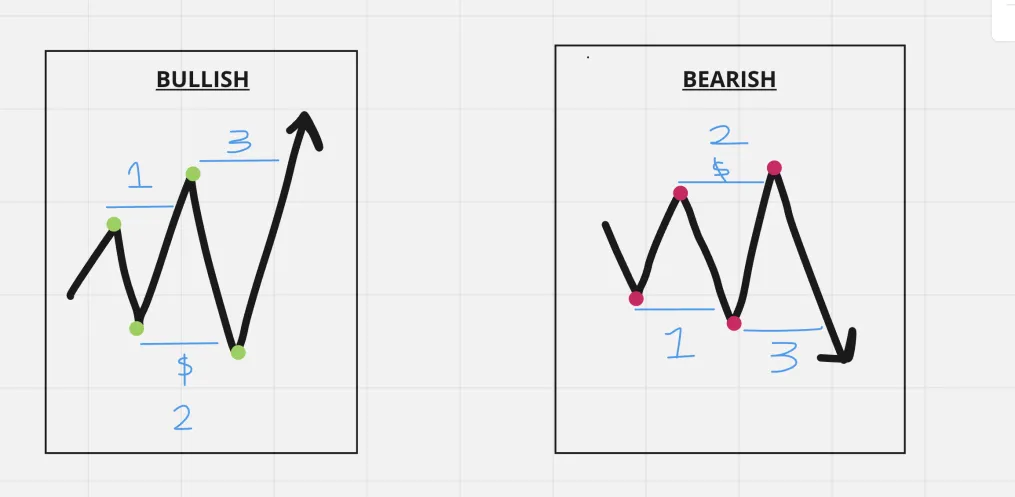
<br/>
__zeds structure schematic__

In [250]:
# ITERATIVE LOOK BACK x TICKS
lookback_period = 4

# PARALLEL LISTS LABELING LOOKBACK RUNS
lb_runs = []
lb_labels = []

# PARSE DATA & LABEL LOOKBACK RUN
for i in range(lookback_period-1, len(data), lookback_period):
    arr   =  [ (data.index[x].strftime('%Y-%m-%d') , data.iloc[x]["Close"]) for x in range(i-lookback_period , i , 1) ]

    if arr[0][1] > arr[1][1] and arr[1][1] < arr[2][1] and arr[2][1] > arr[3][1]:
        lb_labels.append("bull")
    elif arr[0][1] < arr[1][1] and arr[1][1] > arr[2][1] and arr[2][1] < arr[3][1]:
        lb_labels.append("bear")
    else:
        lb_labels.append("unrecognized")
    lb_runs.append(arr)

# debugging test
for x in range(0, len(lb_runs), 1):
    run_dates =  f"{lb_runs[x][0][0]} --> {lb_runs[x][-1][0]} | {lb_labels[x]}" 
    print( run_dates )

2023-11-22 --> 2020-11-05 | unrecognized
2020-11-06 --> 2020-11-11 | bear
2020-11-12 --> 2020-11-17 | unrecognized
2020-11-18 --> 2020-11-23 | bear
2020-11-24 --> 2020-11-30 | bull
2020-12-01 --> 2020-12-04 | bear
2020-12-07 --> 2020-12-10 | unrecognized
2020-12-11 --> 2020-12-16 | unrecognized
2020-12-17 --> 2020-12-22 | unrecognized
2020-12-23 --> 2020-12-29 | unrecognized
2020-12-30 --> 2021-01-05 | bear
2021-01-06 --> 2021-01-11 | unrecognized
2021-01-12 --> 2021-01-15 | unrecognized
2021-01-19 --> 2021-01-22 | unrecognized
2021-01-25 --> 2021-01-28 | unrecognized
2021-01-29 --> 2021-02-03 | unrecognized
2021-02-04 --> 2021-02-09 | unrecognized
2021-02-10 --> 2021-02-16 | unrecognized
2021-02-17 --> 2021-02-22 | unrecognized
2021-02-23 --> 2021-02-26 | unrecognized
2021-03-01 --> 2021-03-04 | unrecognized
2021-03-05 --> 2021-03-10 | unrecognized
2021-03-11 --> 2021-03-16 | unrecognized
2021-03-17 --> 2021-03-22 | unrecognized
2021-03-23 --> 2021-03-26 | unrecognized
2021-03-29 --> 

## ITERATIVE ANALYSIS VISUALIZATION

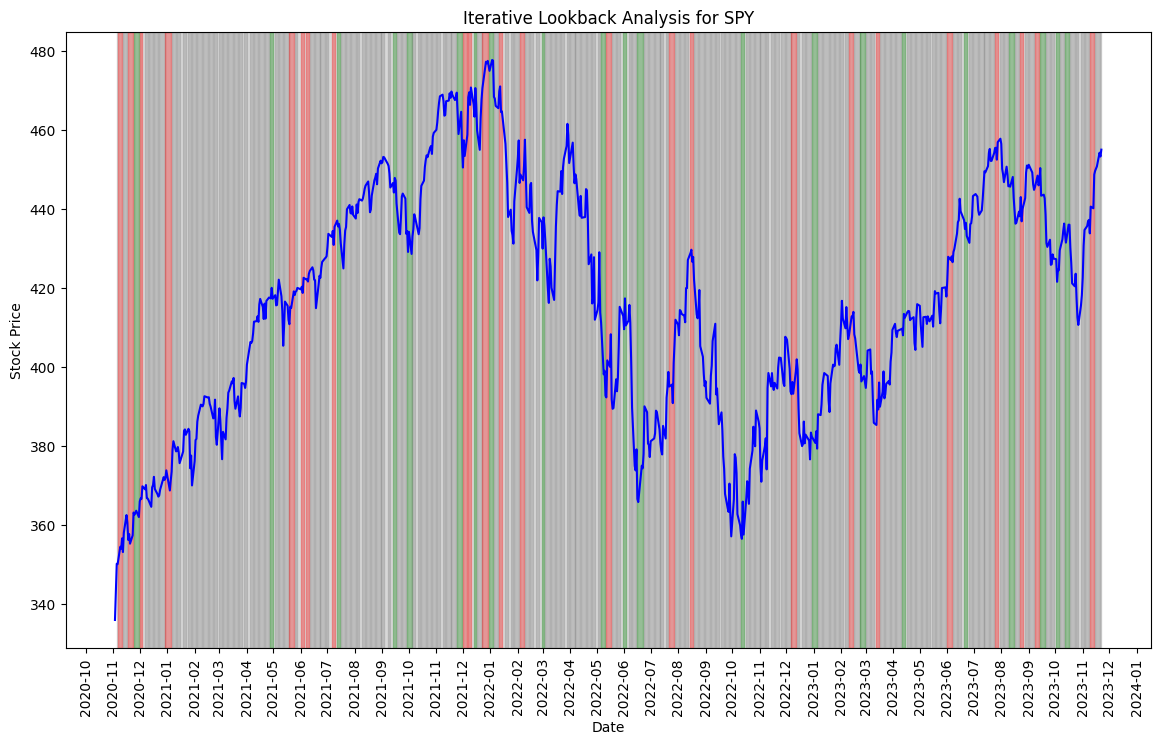

In [251]:
# Create a plot
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the stock price
ax.plot(data.index, data['Close'], label='Close Price', color='blue')

# Iterate over the lb_runs and lb_labels
for i in range(len(lb_runs)):
    start_date = pd.to_datetime(lb_runs[i][0][0])
    end_date = pd.to_datetime(lb_runs[i][-1][0])

    # Choose a color based on the label
    color = 'green' if lb_labels[i] == 'bull' else ('red' if lb_labels[i] == 'bear' else 'grey')

    # Plot a vertical line span for each lookback period with color coding
    ax.axvspan(start_date, end_date, color=color, alpha=0.3, label=f'{lb_labels[i].capitalize()} Run {i+1}')

# Optionally, format the date axis for better readability
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=90)  # Set rotation for date labels

# Add labels, title, and legend
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
ax.set_title(f'Iterative Lookback Analysis for {symbol}')
# ax.legend()

# Show the plot
plt.show()


### Add Iterative Analysis Structure Schematic labels to dataset 

In [255]:
data['Run'] = np.nan 

# TODO: take the 
# for i in range(lookback_period-1, len(data), lookback_period):
#     print(lb_runs[i])  
#     print(lb_labels[i])  

# debug
print(lb_runs[0])
print(lb_labels[0])


# data.head(50)

[('2023-11-22', 455.0199890136719), ('2020-11-03', 336.0299987792969), ('2020-11-04', 343.5400085449219), ('2020-11-05', 350.239990234375)]
unrecognized
